# Analysis and Insights

* Looking at the heat map of Average Income by Neighbourhood, it seems that midtown neighbourhoods generally have higher average income, and Downtown and Northwest tend to have higher crime rate. 
* Seeing the heat map of Crime Rate by Neighbourghood, it seems that downtown and northwest areas tend to have higher crime rates. 
* The heat map of the number Starbucks stores by neighbourhood in Toronto shows stores are significantly concentrated in downtown area. Especially, in one neighbourhood called ‘Bay Street Corridor’, there are 26 stores. We can assume that foot traffic than the average income would be a more important factor for Starbucks Locations. In other words, neighbourhoods where there are a lot of offices and businesses tend to have more stores.

In [1]:
%matplotlib inline

In [2]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [3]:
import geopandas as gpd
import seaborn as sns
from shapely.geometry import Point, Polygon
import os

In [4]:
sns.set(style="darkgrid")

In [5]:
nb = os.path.join('Data Cleaning', 'Resources', 'Neighbourhoods', "Neighbourhoods.shp")
regions = gpd.read_file(nb)
regions['neighbourhood'] = regions['FIELD_7'].str.replace(' \(.+\)', '').str.lower()
regions.sample(5)

,FIELD_1,FIELD_2,FIELD_3,FIELD_4,FIELD_5,FIELD_6,FIELD_7,FIELD_8,FIELD_9,FIELD_10,FIELD_11,FIELD_12,FIELD_13,FIELD_14,FIELD_15,geometry,neighbourhood
24,2125,25886561,25926686,49885,50,50,Newtonbrook East (50),Newtonbrook East (50),None,None,-79.405937,43.791536,16491889,7.844180e+06,11218.654868,"POLYGON ((-79.42008 43.79800, -79.41973 43.798...",newtonbrook east
13,2114,25886697,25926675,49885,29,29,Maple Leaf (29),Maple Leaf (29),None,None,-79.480758,43.715574,16491713,4.839830e+06,8828.133556,"POLYGON ((-79.49249 43.72010, -79.49185 43.720...",maple leaf
35,2136,25886695,25926697,49885,23,23,Pelmo Park-Humberlea (23),Pelmo Park-Humberlea (23),None,None,-79.528282,43.717515,16492065,8.192345e+06,19153.402107,"POLYGON ((-79.50783 43.71776, -79.50779 43.717...",pelmo park-humberlea
112,2213,25886733,25926774,49885,5,5,Elms-Old Rexdale (5),Elms-Old Rexdale (5),None,None,-79.548983,43.721519,16493297,5.616463e+06,12955.634989,"POLYGON ((-79.55512 43.71510, -79.55569 43.716...",elms-old rexdale
14,2115,25886785,25926676,49885,12,12,Markland Wood (12),Markland Wood (12),None,None,-79.573432,43.633542,16491729,5.643281e+06,10845.612363,"POLYGON ((-79.55959 43.63624, -79.55957 43.636...",markland wood


In [6]:
starbucks_final = pd.read_csv('Data Cleaning/output_data/starbucks_final.csv', index_col='Hood_ID')
starbucks_final.drop('Unnamed: 0', axis='columns', inplace=True)
starbucks_final.head()

,Neighbourhood,Number of Stores
Hood_ID,,
76,bay street corridor,26
77,waterfront communities-the island,19
75,church-yonge corridor,8
14,islington-city centre west,8
95,annex,7


## Number of Starbucks Stores Heatmap

In [7]:
# Join the dataset with the available mapping files.
# We will fill in the neighbourhoods which were not present in the dataset with 0.
# this way we will still see the neighbourhood in the map, but no housing will be shown on it.
merged = regions.set_index('FIELD_6').join(starbucks_final)
merged = merged.reset_index()
merged = merged.fillna(0)
merged[['neighbourhood', 'FIELD_11', 'FIELD_12', 'geometry', 'Number of Stores']].sample(5)

,neighbourhood,FIELD_11,FIELD_12,geometry,Number of Stores
108,dufferin grove,-79.437341,43.655428,"POLYGON ((-79.44987 43.65688, -79.44965 43.656...",1.0
70,willowridge-martingrove-richview,-79.554221,43.683645,"POLYGON ((-79.52661 43.68233, -79.52705 43.682...",0.0
56,thistletown-beaumond heights,-79.563491,43.737988,"POLYGON ((-79.57751 43.73384, -79.57806 43.734...",0.0
58,trinity-bellwoods,-79.415342,43.650176,"POLYGON ((-79.42241 43.64349, -79.42255 43.643...",1.0
45,runnymede-bloor west village,-79.485708,43.659269,"POLYGON ((-79.48002 43.66006, -79.47974 43.659...",1.0


<ipython-input-8-b77c6a5c2ea6>:26: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s=row['neighbourhood'], xy=(row['FIELD_11'], row['FIELD_12']),


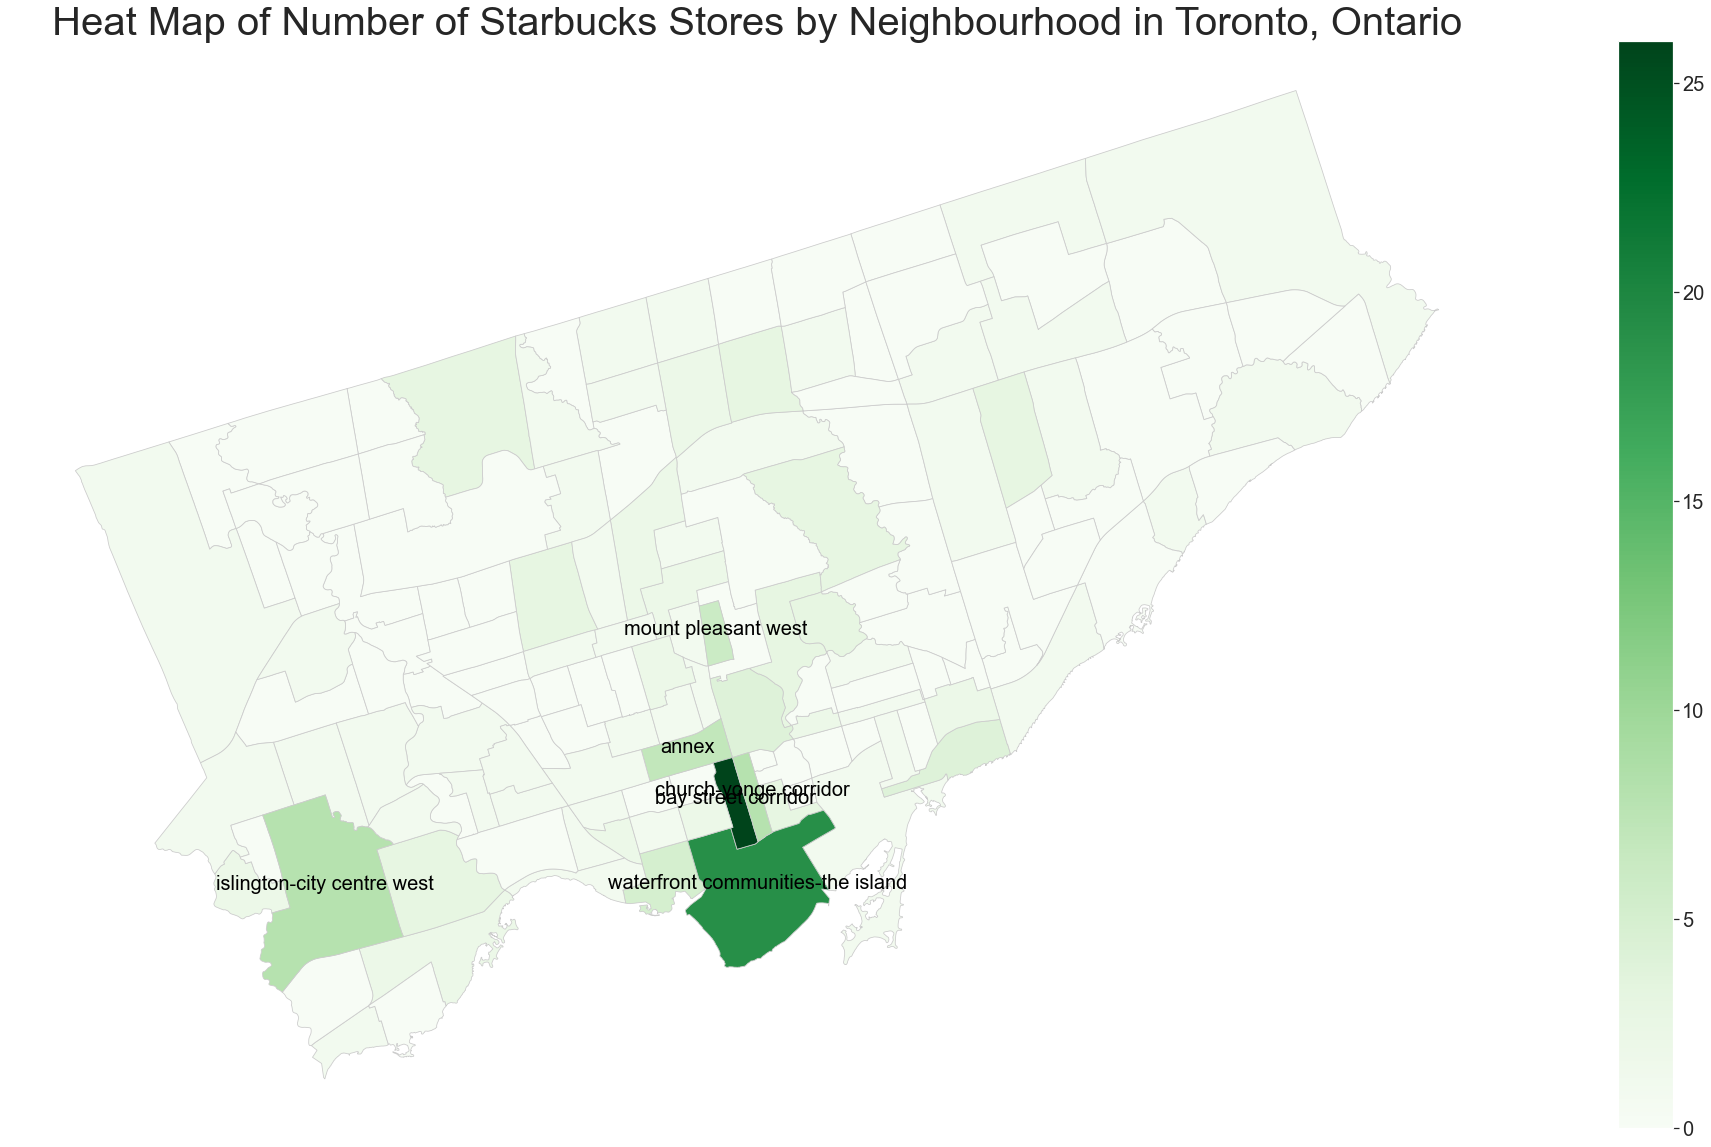

In [8]:
# we are using the maximum and minimum count values from the previous cell.
# setting additionally properties for the plot such as titles, turning of the axis for better visibility
# and setting the color scheme to look like a heat map.
fig, ax = plt.subplots(1, figsize=(40, 20))
ax.axis('off')
ax.set_title('Heat Map of Number of Starbucks Stores by Neighbourhood in Toronto, Ontario', fontdict={'fontsize': '40', 'fontweight' : '3'})


# Create colorbar as a legend
# empty array for the data range
# add the colorbar to the figure
# set the color bar label text size
color = 'Greens'
vmin, vmax = 0, 26
sm = plt.cm.ScalarMappable(cmap=color, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.tick_params(labelsize=20)


# actually plot the map
# we will only annotate the plot for neighbourhoods with more than 5 Starbucks Stores
merged.plot('Number of Stores', cmap=color, linewidth=0.8, ax=ax, edgecolor='0.8', figsize=(40,20))
for idx, row in merged.iterrows():
    if(row['Number of Stores'] > 5):
        plt.annotate(s=row['neighbourhood'], xy=(row['FIELD_11'], row['FIELD_12']),
                 horizontalalignment='center', fontsize=20, color='black', wrap=True)
        

plt.savefig("Graphs_and_Analysis/Images/Starbucks_Stores_Heatmap")
plt.show()

## Income and Crime Rate Heatmap

In [10]:
income_heatmap_df = pd.read_csv('Graphs and Analysis/Edited_Final_Data.csv', index_col='Hood_ID')
income_heatmap_df.drop('Unnamed: 0', axis='columns', inplace=True)
income_heatmap_df = income_heatmap_df.loc[:, ['Neighbourhood', 'Median_Income', 'Average_Income', 'Total Average Rate']]
income_heatmap_df

,Neighbourhood,Median_Income,Average_Income,Total Average Rate
Hood_ID,,,,
85,South Parkdale,35601.0,46896.0,317.32
70,South Riverdale,65076.0,83491.0,292.97
40,St.Andrew-Windfields,94271.0,189629.0,181.53
61,Taylor-Massey,40915.0,51242.0,227.42
21,Humber Summit,57786.0,68431.0,487.28
...,...,...,...,...
106,Humewood-Cedarvale,57140.0,92623.0,118.33
14,Islington-City Centre West,66537.0,89289.0,224.03
66,Danforth,69640.0,85379.0,250.02


In [11]:
# Join the dataset with the available mapping files.
# We will fill in the neighbourhoods which were not present in the dataset with 0.
# this way we will still see the neighbourhood in the map, but no housing will be shown on it.
income_merged = regions.set_index('FIELD_6').join(income_heatmap_df)
income_merged = income_merged.reset_index()
income_merged.dropna(axis=0, how='any', subset=['Average_Income'], inplace=True)
income_merged[['neighbourhood', 'FIELD_11', 'FIELD_12', 'geometry', 'Median_Income', 'Average_Income', 'Total Average Rate']].sample(5)

,neighbourhood,FIELD_11,FIELD_12,geometry,Median_Income,Average_Income,Total Average Rate
139,l'amoreaux,-79.314084,43.795716,"POLYGON ((-79.28857 43.79607, -79.28921 43.795...",53644.0,67279.0,143.58
0,wychwood,-79.425515,43.676919,"POLYGON ((-79.43592 43.68015, -79.43492 43.680...",55941.0,84199.0,160.28
75,agincourt south-malvern west,-79.265612,43.788658,"POLYGON ((-79.25498 43.78122, -79.25797 43.780...",59013.0,73156.0,230.80
118,forest hill south,-79.414318,43.694526,"POLYGON ((-79.42556 43.70099, -79.42314 43.701...",78269.0,226031.0,156.87
20,mount olive-silverstone-jamestown,-79.587259,43.746868,"POLYGON ((-79.60338 43.75786, -79.60205 43.758...",49934.0,58605.0,232.13


<ipython-input-12-59aa4e5cbf80>:18: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s=row['neighbourhood'], xy=(row['FIELD_11'], row['FIELD_12']),


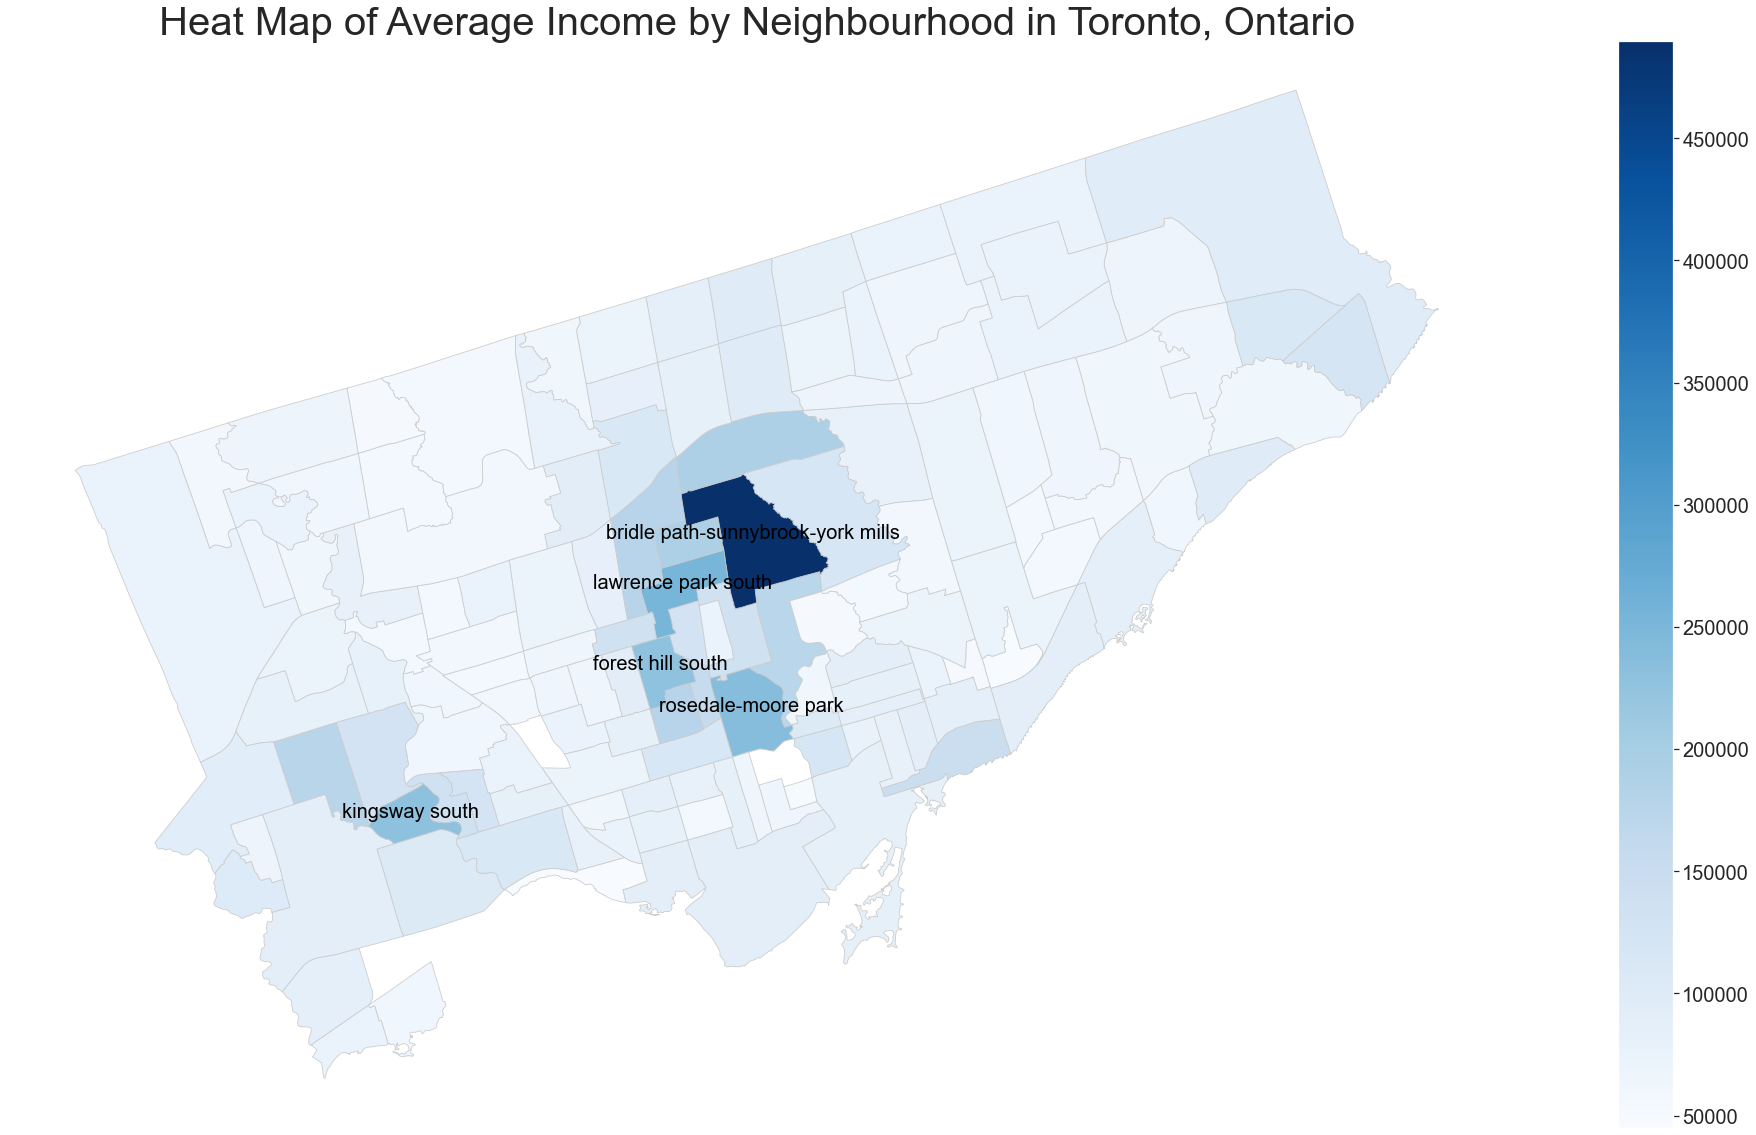

In [12]:
# Creat a heatmap
fig, ax = plt.subplots(1, figsize=(40, 20))
ax.axis('off')
ax.set_title('Heat Map of Average Income by Neighbourhood in Toronto, Ontario', fontdict={'fontsize': '40', 'fontweight' : '3'})

color = 'Blues'
vmin, vmax = 45000, 490000
sm = plt.cm.ScalarMappable(cmap=color, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.tick_params(labelsize=20)

# actually plot the map
# we will only annotate the plot for neighbourhoods with more than average income of 200,000
income_merged.plot('Average_Income', cmap=color, linewidth=0.8, ax=ax, edgecolor='0.8', figsize=(40,20))
for idx, row in income_merged.iterrows():
    if(row['Average_Income'] > 200000):
        plt.annotate(s=row['neighbourhood'], xy=(row['FIELD_11'], row['FIELD_12']),
                 horizontalalignment='center', fontsize=20, color='black', wrap=True)

plt.savefig("Graphs_and_Analysis/Images/Average_Income_Heatmap")
plt.show()

In [13]:
print(min(income_merged['Total Average Rate']))
print(max(income_merged['Total Average Rate']))

84.03
885.75


<ipython-input-14-35572404804c>:18: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s=row['neighbourhood'], xy=(row['FIELD_11'], row['FIELD_12']),


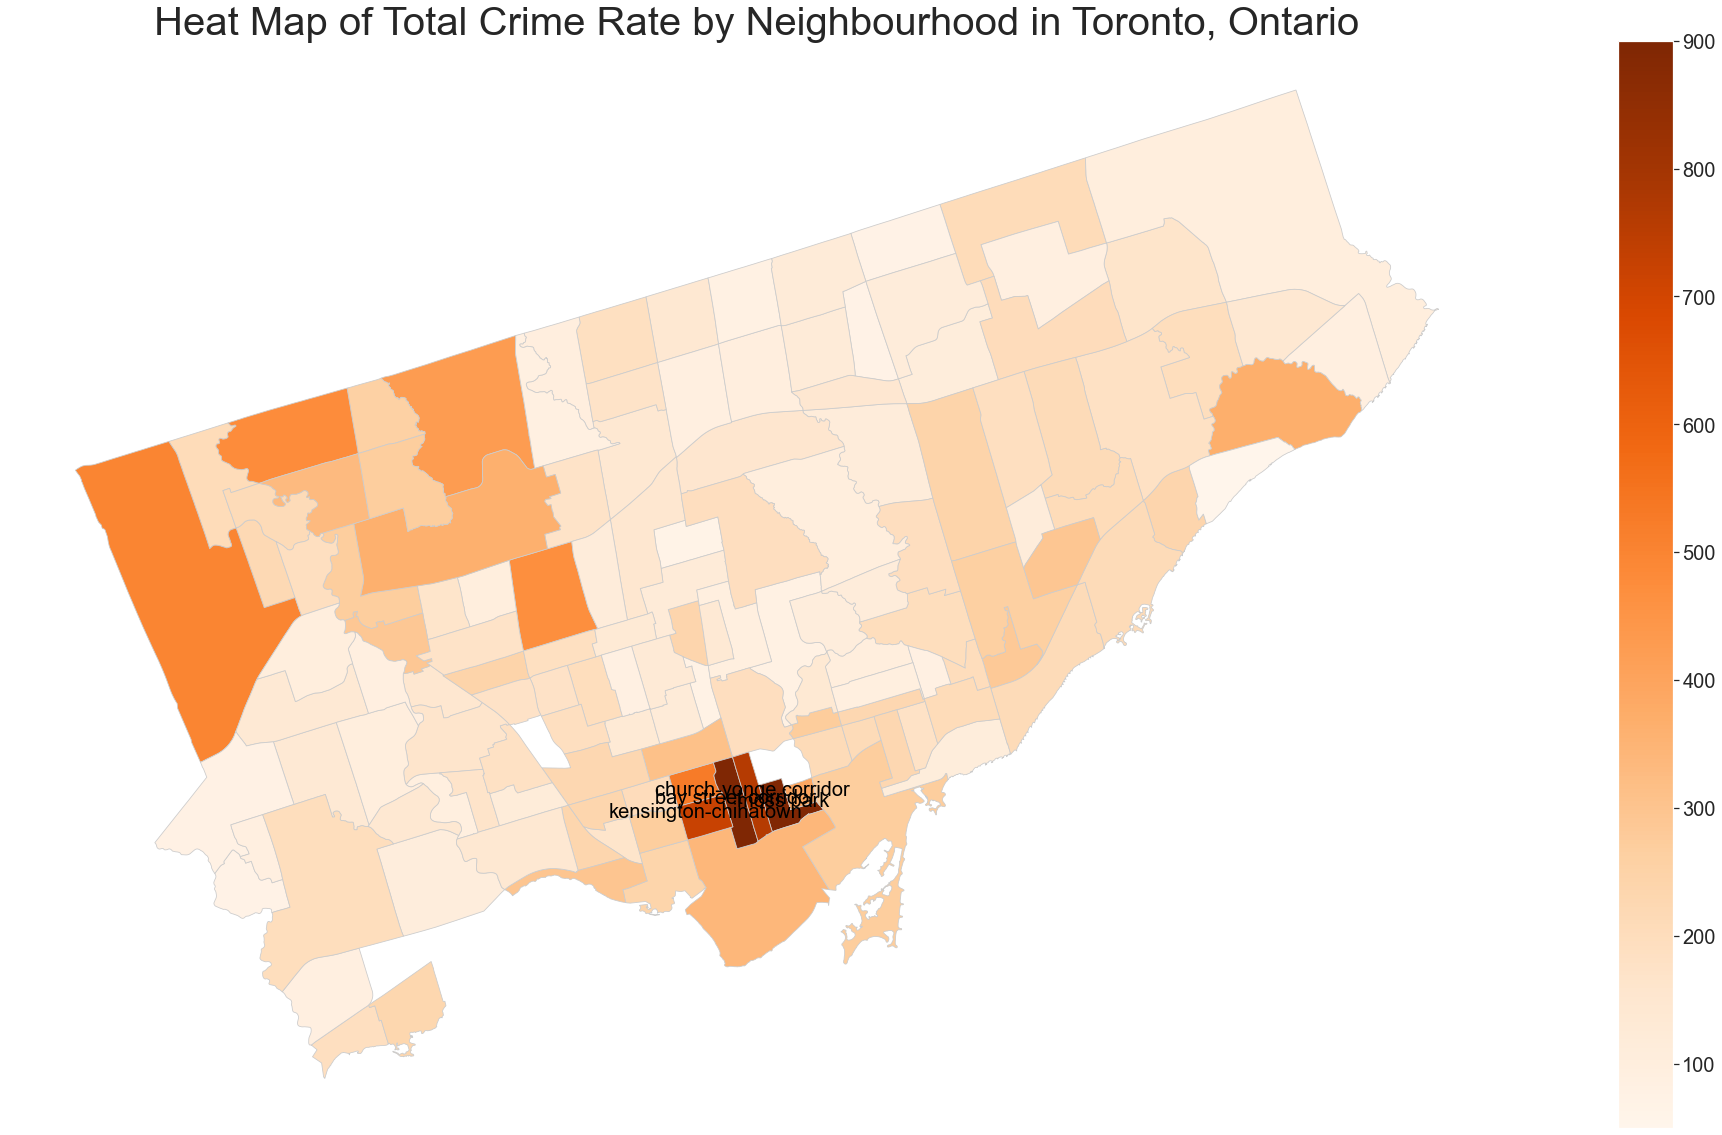

In [14]:
# Creat a heatmap
fig, ax = plt.subplots(1, figsize=(40, 20))
ax.axis('off')
ax.set_title('Heat Map of Total Crime Rate by Neighbourhood in Toronto, Ontario', fontdict={'fontsize': '40', 'fontweight' : '3'})

color = 'Oranges'
vmin, vmax = 50, 900
sm = plt.cm.ScalarMappable(cmap=color, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.tick_params(labelsize=20)

# actually plot the map
# we will only annotate the plot for neighbourhoods with more than average income of 200,000
income_merged.plot('Total Average Rate', cmap=color, linewidth=0.8, ax=ax, edgecolor='0.8', figsize=(40,20))
for idx, row in income_merged.iterrows():
    if(row['Total Average Rate'] > 600):
        plt.annotate(s=row['neighbourhood'], xy=(row['FIELD_11'], row['FIELD_12']),
                 horizontalalignment='center', fontsize=20, color='black', wrap=True)

plt.savefig("Graphs_and_Analysis/Images/Crime_Rate_Heatmap")
plt.show()

## House prices & population heatmaps

In [17]:
edited_final_df = pd.read_csv('Graphs and Analysis/Edited_Final_Data.csv', index_col='Hood_ID')
edited_final_df.drop('Unnamed: 0', axis='columns', inplace=True)
edited_final_df = edited_final_df.loc[:, ['Neighbourhood', 'Home Prices', 'Population, 2016']]
edited_final_df.head()

,Neighbourhood,Home Prices,"Population, 2016"
Hood_ID,,,
85,South Parkdale,500054.0,21849.0
70,South Riverdale,537087.0,27876.0
40,St.Andrew-Windfields,1363202.0,17812.0
61,Taylor-Massey,254151.0,15683.0
21,Humber Summit,354381.0,12416.0


In [18]:
# Join the dataset with the available mapping files.
house_pop_merged = regions.set_index('FIELD_6').join(edited_final_df)
house_pop_merged = house_pop_merged.reset_index()
house_pop_merged[['neighbourhood', 'FIELD_11', 'FIELD_12', 'geometry', 'Home Prices', 'Population, 2016']].sample(5)

,neighbourhood,FIELD_11,FIELD_12,geometry,Home Prices,"Population, 2016"
80,bay street corridor,-79.385721,43.657511,"POLYGON ((-79.38752 43.65067, -79.38663 43.650...",457787.0,25797.0
3,york university heights,-79.488883,43.765736,"POLYGON ((-79.50529 43.75987, -79.50488 43.759...",359372.0,27593.0
8,lawrence park south,-79.406039,43.717212,"POLYGON ((-79.41096 43.70408, -79.41165 43.703...",1215390.0,15179.0
60,victoria village,-79.314874,43.728489,"POLYGON ((-79.30265 43.72472, -79.30210 43.723...",365107.0,17510.0
10,little portugal,-79.430323,43.647536,"POLYGON ((-79.42140 43.64061, -79.42144 43.640...",514960.0,15559.0


In [19]:
print(min(house_pop_merged['Home Prices']))
print(max(house_pop_merged['Home Prices']))
print(min(house_pop_merged['Population, 2016']))
print(max(house_pop_merged['Population, 2016']))

204104.0
1849084.0
6577.0
65913.0


<ipython-input-20-e9093976f8a2>:19: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s=row['neighbourhood'], xy=(row['FIELD_11'], row['FIELD_12']),


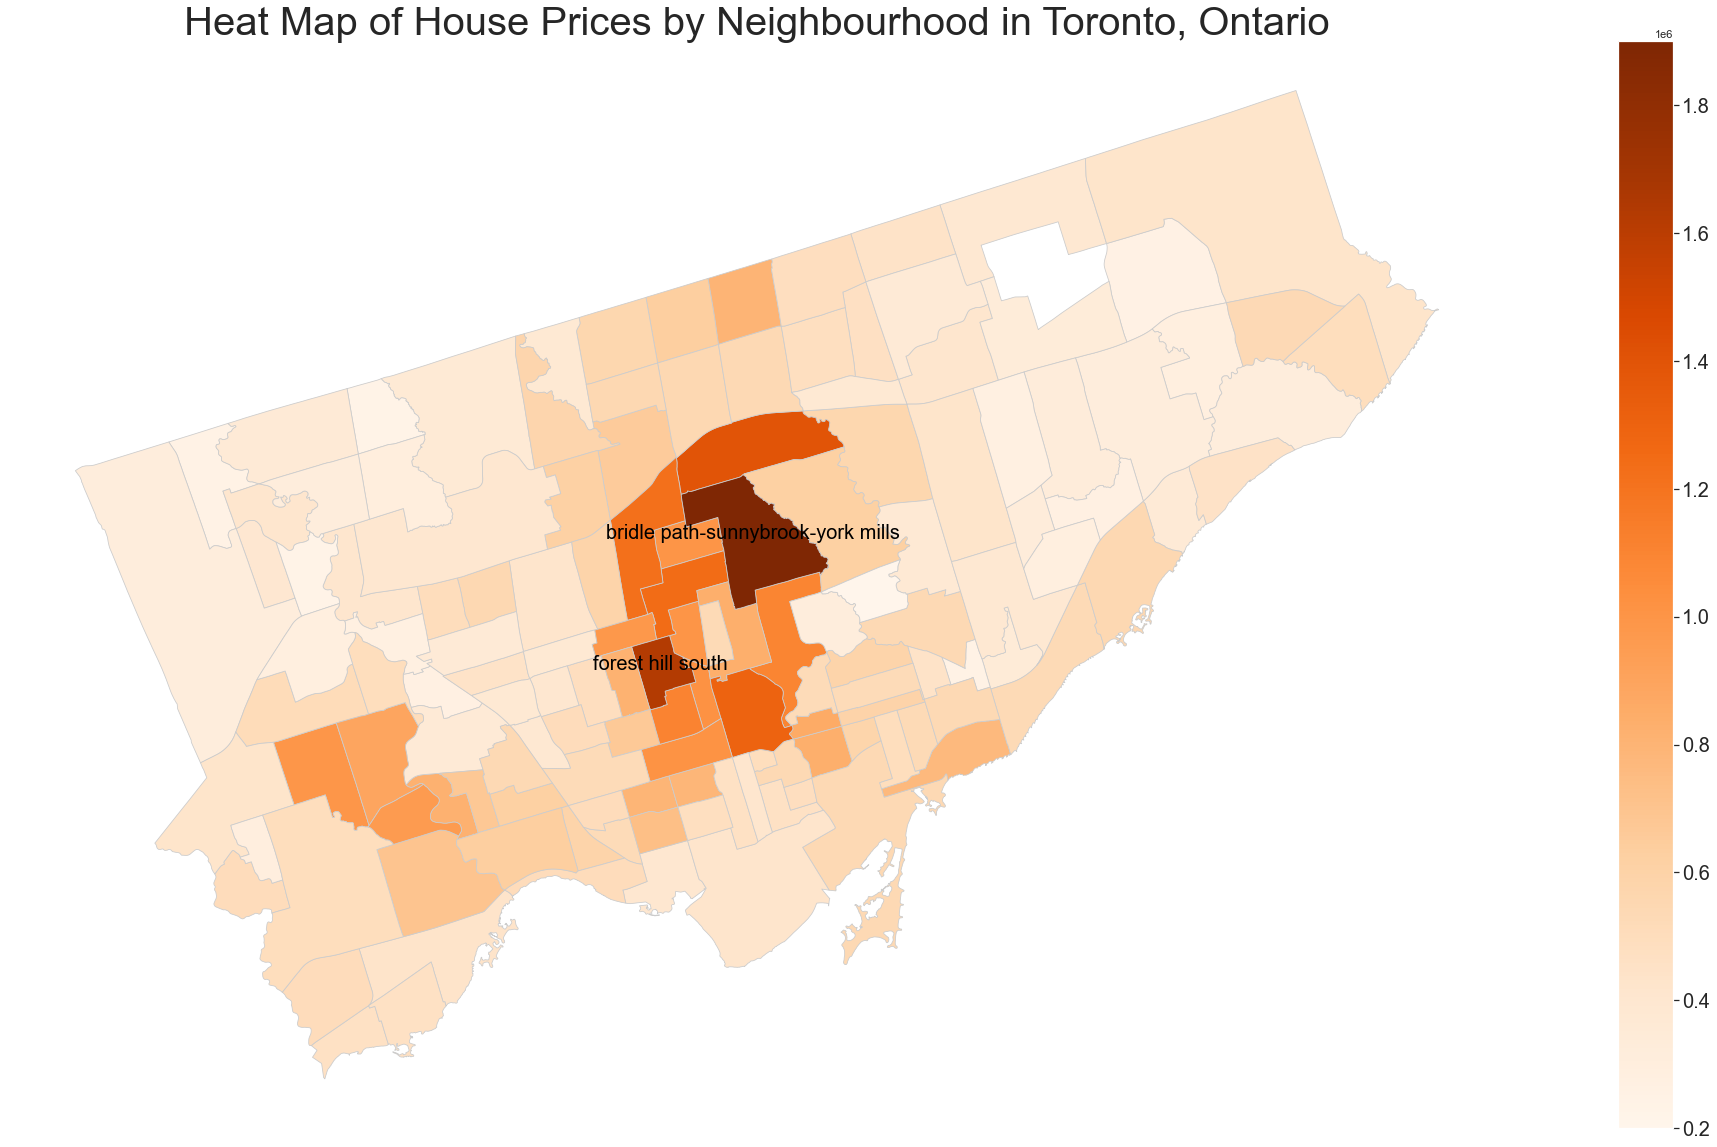

In [20]:
# Create a heatmap
fig, ax = plt.subplots(1, figsize=(40, 20))
ax.axis('off')
ax.set_title('Heat Map of House Prices by Neighbourhood in Toronto, Ontario', fontdict={'fontsize': '40', 'fontweight' : '3'})

color = 'Oranges'
vmin, vmax = 200000, 1900000
sm = plt.cm.ScalarMappable(cmap=color, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.tick_params(labelsize=20)


# actually plot the map
# we will only annotate the plot for neighbourhoods with more than 1,500,000 house prices
house_pop_merged.plot('Home Prices', cmap=color, linewidth=0.8, ax=ax, edgecolor='0.8', figsize=(40,20))
for idx, row in house_pop_merged.iterrows():
    if(row['Home Prices'] > 1500000):
        plt.annotate(s=row['neighbourhood'], xy=(row['FIELD_11'], row['FIELD_12']),
                 horizontalalignment='center', fontsize=20, color='black', wrap=True)

plt.savefig("Graphs_and_Analysis/Images/House_Prices_Heatmap")        
plt.show()

<ipython-input-21-13af714b26f3>:19: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s=row['neighbourhood'], xy=(row['FIELD_11'], row['FIELD_12']),


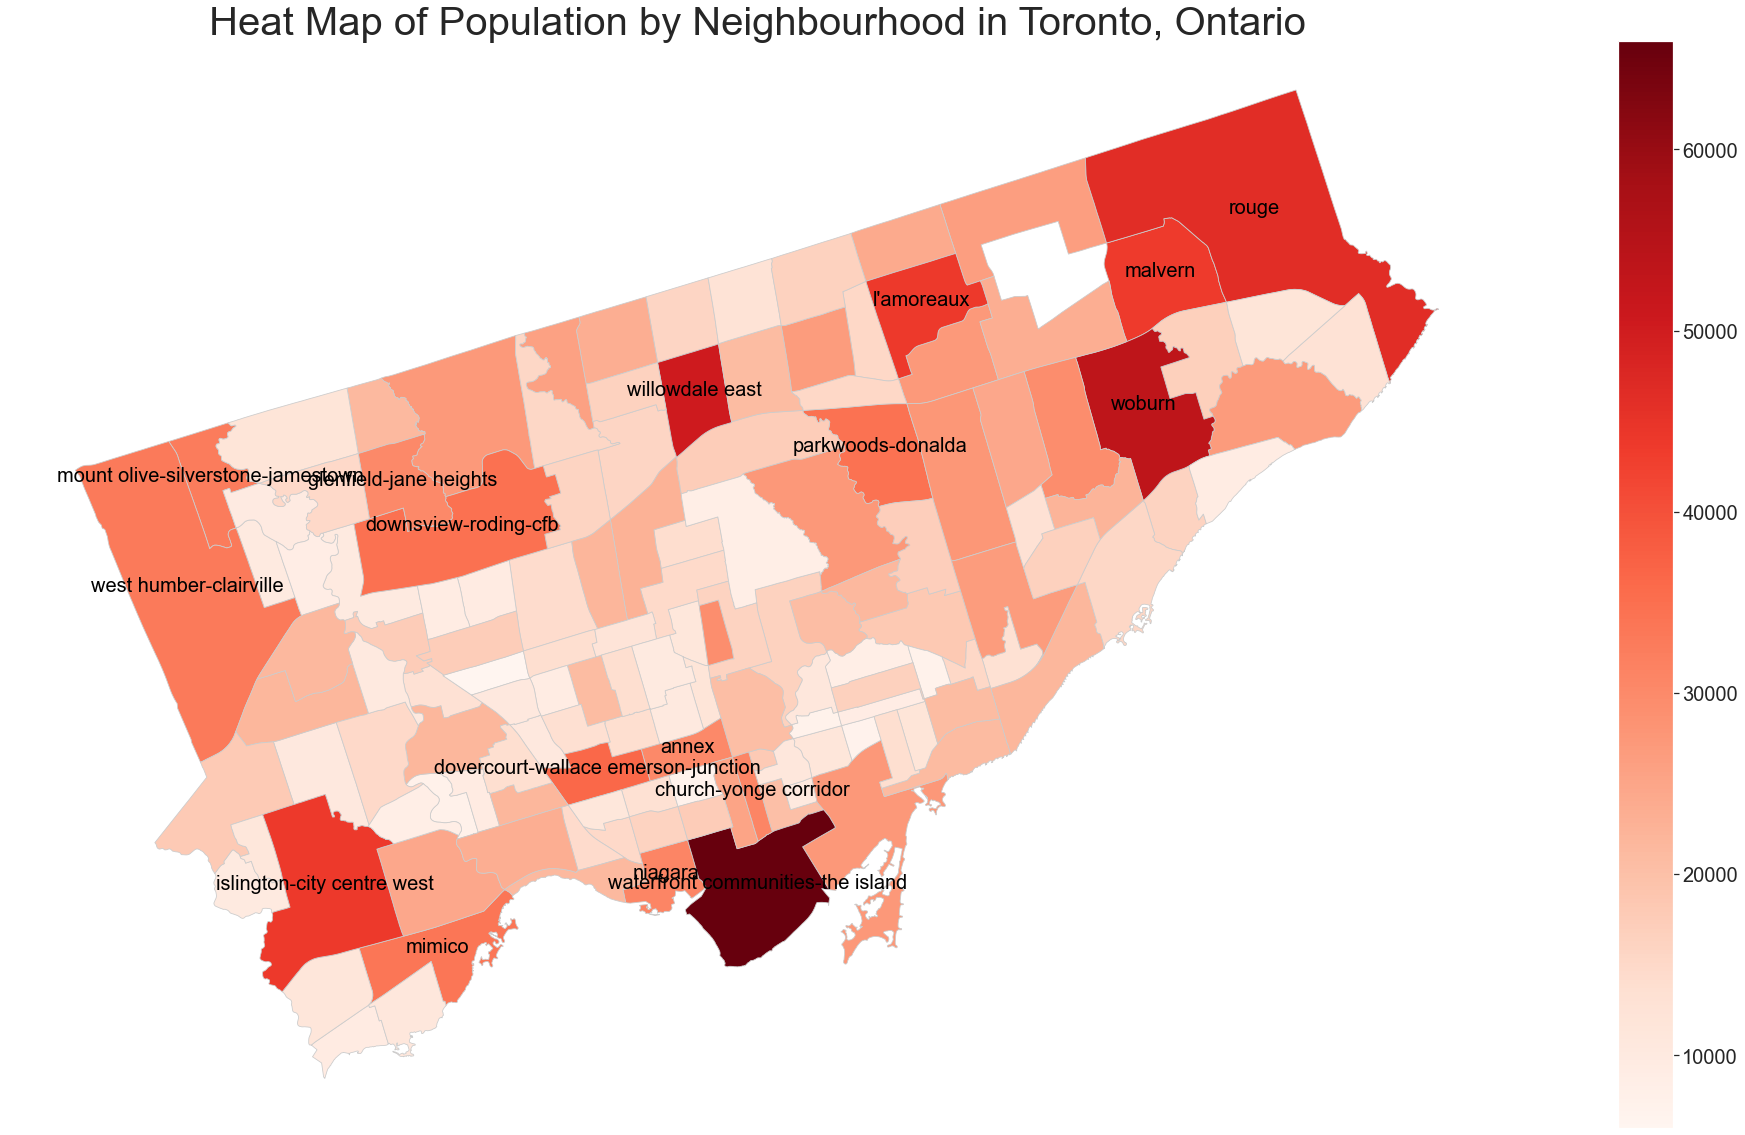

In [21]:
# Creat a heatmap
fig, ax = plt.subplots(1, figsize=(40, 20))
ax.axis('off')
ax.set_title('Heat Map of Population by Neighbourhood in Toronto, Ontario', fontdict={'fontsize': '40', 'fontweight' : '3'})

color = 'Reds'
vmin, vmax = 6000, 66000
sm = plt.cm.ScalarMappable(cmap=color, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.tick_params(labelsize=20)


# actually plot the map
# we will only annotate the plot for neighbourhoods with more than population of 30,000
house_pop_merged.plot('Population, 2016', cmap=color, linewidth=0.8, ax=ax, edgecolor='0.8', figsize=(40,20))
for idx, row in house_pop_merged.iterrows():
    if(row['Population, 2016'] > 30000):
        plt.annotate(s=row['neighbourhood'], xy=(row['FIELD_11'], row['FIELD_12']),
                 horizontalalignment='center', fontsize=20, color='black', wrap=True)

plt.savefig("Graphs_and_Analysis/Images/Population_Heatmap")
plt.show()